# Project Outline

## Introduction

Molecular dynamics (MD) simulations is a method that uses equations of motion for each specified particle in a defined system to directly simulate the dynamics of the particles. This method can be applied to observe and analyze systems at a microscopic level. In the field of chemistry, this is particularly useful because chemists study systems that are a collection of particles and a method like MD allows them to observe the behaviors of systems at an atomic level which is impossible to do with traditional methods of chemical analysis. 

This project will implement MD to study the behavior of water. The topic of water was chosen because it exhibits unique properties. Typically, most substances exhibit the greatest density in its solid phase. However, on a macroscopic scale, we know that solid ice is less dense than liquid water and the reason behind that lies within the structure of water.
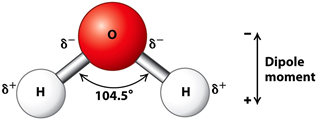


Structurally, water is made of two hydrogens covalently bonded to an oxygen atom.  The electronegativity of oxygens causes these oxygen hydrogen bonds to be polar and thus oxygen holds a partial negative charge and the hydrogens hold a partial positive charge. The two lone pairs on the oxygen atom causes the hydrogen atoms to be pushed down giving the molecule its bent geometry. This is expressed in the following figure. 

Image source: [alevelbiology.co.uk](https://alevelbiology.co.uk/notes/water-structure-properties/)

Because of its polarity and bent geometry, a water molecule can form up to 4 hydrogen bonds with its neighboring molecules. In solid water (temperatures below 273K), the molecules assume a crystal structure dictated by a vast network hydrogen bonds. This is depicted in the following figure (the green lines represent hydrogen bonds). 
![image](https://chem.libretexts.org/@api/deki/files/37845/icecrystruct.png?revision=1)

Image source: [chem.libretexts.org](https://chem.libretexts.org/Textbook_Maps/General_Chemistry_Textbook_Maps/Map%3A_Chem1_(Lower)/07%3A_Solids_and_Liquids/7.03%3A_Hydrogen-Bonding_and_Water)

As thermal energy increases, the molecules gain enough energy to overcome the strength of the hydrogen bonds. Thus, the molecules can exhibit more modes of motion and consequently the molecules can come closer together, increasing density. This is expected in the liquid phase of water (temperatures above 273K and below 373K). 

Specifically, this project will use MD to simulate 2,000 water molecules placed in the center of a box in a spherical shape. First, the energy of the system will be minimized and then the molecules will be annealed by raising the temperature of the system to 300K and slowly bringing it down to 200K. Then the system stays at 200K for 0.5 ns. Afterwards, data of the positions of each atom was collected  and saved to a pdb file every 500 fs over the span of 2ns and then the temperature of the system was raised by 50K. This last step was repeated for 250K, 300K, 350K, and 400K. A graphical representation of the simulation is depicted below. (INSERT AN IMAGE!!!!!)

Once the simulation is complete, trajectory files for each temperature was used for analysis to identify the density as a function of radius at each temperature. Further analysis will be done to observe how density changes with respect to radius and will be comparisions will be made between temperatures. Taking into consideration the structural properties of water, we should expect that overall density of water will be greatest at temperatures where water is in its liquid phase and smallest in its gaseous phase while the solid phase will be in the middle. 

## Mathematical Model 

When constructing a molecular dynamics system, the net forces felt by each individual atom needs to be taken into consideration when estimating the positions of each atom for the next timestep. This includes the intramolecular forces and the intermolecular forces. 

Intramolecular forces include bond stretching, bending, torsion and improper torsion. In the case of water, torsion and improper torsion are not relevant because water molecules cannot exhibit those motions. Intermolecular forces include charge to charge, Vander Waal, dipole-dipole, and quadrupole interactions. OpenMM uses AMEOBA as a forcefield to calculate the forces felt by each atom (Ponder, 2010). AMEOBA was chosen specifically for its ability to implement quadruple interactions. Quadrupole interactions are especially important in the case of water because polarizability plays a huge role in the hydrogen bonds that are formed. 

As for the integrator for this system, a Langevin integrator was used. This method is Verlet like in that it calculates the positions of the atoms for the next time step in the same fashion.
The Verlet method is a numerical method that integrates the Newton’s equations of motion by taking the Taylor expansion in the forward and backward direction and adding the two equations and deriving a term to calculate the postition at the next timestep (y(i+1) term). This is shown below (Giordano, 2006).

Forward expansion:
$$
y(t_{i}+\Delta t)= y(t_{i})+\frac{\mathrm{d}y }{\mathrm{d} t}\Delta t+ \frac{1}{2}\frac{\mathrm{d^{2}}y }{\mathrm{d^{2}} t} \Delta t^{2}+\frac{1}{6}\frac{\mathrm{d^{3}} y}{\mathrm{d^{3}} t} \Delta t^{3}+...
$$
Backward expansion:
$$
y(t_{i}-\Delta t)= y(t_{i})-\frac{\mathrm{d}y }{\mathrm{d} t}\Delta t+ \frac{1}{2}\frac{\mathrm{d^{2}} }{\mathrm{d^{2}} t} \Delta t^{2}-\frac{1}{6}\frac{\mathrm{d^{3}} }{\mathrm{d^{3}} t} \Delta t^{3}+...
$$
Forward + Backward:
$$
y_{i+1} = 2y_{i}-y_{i-1}+\frac{\mathrm{d^{2}} y}{\mathrm{d^{2}} t}(\Delta t^{2}) 
$$

This approach allows the error term to be an order of delta t smaller than the 2nd order Runge-Kutta method and it avoids the calculation of dy/dt. Thus, this calculation provides a smaller numerical error while keeping the calculations relatively simple. However, it is important to note that the y(i-1) needs to be provided by to start the algorithm. This value can be determined via another method such as Euler or Runge-Kutta. 

Unlike the Verlett method, the Langevin integrater uses the Langevin equations of motion and these equations has the added ability control temperature within the system and add friction to the system which is required for the aims of this project (Schiller, 2008).


## Numerical Method
A numerical derivative will be implemented to see how density changes as a with respect to radius. The numerical derivative will implement the standard definition of the derivative (see below) with some alterations to improve accuracy. From the standard definition, we cannot take the limit (h-->0). 
$$\frac{\mathrm{df} }{\mathrm{d} x}=\lim_{h \to 0 }\frac{f(x+h)-f(x)}{h}$$

However, by making the size of h small, an approximation can be calculated. Accuracy can be further improved by using the central difference (see below). This alteration to the definition of the derivative still approximates the derivative using the difference between two values of f(x) at points a distance h apart. The only thing that has changed is that the two points are now placed symmetrically around point x. One point is at 0.5h above x and the other is 0.5h below x. 
$$
\frac{\mathrm{df} }{\mathrm{d} x}\approx\frac{f(x+h/2)-f(x-h/2)}{h}
$$

Since we are taking the derivative of a sampled set of data, we do not know the value of the function at x+0.5h or x-0.5h. Thus, the equation must be altered further to fit this situation. By using points in the sample that are 2h apart the central difference method can be applied. The formula for the central difference will now become:
$$
\frac{\mathrm{df} }{\mathrm{d} x}\approx\frac{f(x+h)-f(x-h)}{2h}
$$


## Preliminary Results from Simulation Analysis

Once the simulations were complete, they were visualized using VMD software. Visually, it is apparent that the as temperature increases the motion of the molecules also increase. This is consistent with what is expected. As temperature increases, thermal energy within the system also increases and this allows molecules to reach higher energy states and have more kinetic energy. It is difficult to qualitatively compare density because measuring tools were not accessed using VMD. However, because the molecules are moving as theoretically expected, this gives a good sign that the density of water will behave as expected as well.  

The videos are available to watch in the folder called Videos in project repsository

Raw data can be accesed [here.](https://pacificu.box.com/v/WaterSimulationData)

Code for running the simulations is in the file called WaterSimulationCode.ipynb in project repository.

#  Functions

In [ ]:
def imports():
    """Imports necessary modules for data analysis"""
    import numpy as np
    import matplotlib.pylab as plt

In [69]:


def file_extract(file,numofframes,numofatoms,numofH,numofO):
        """
    Takes a file and extracts the atom type, atom number,
    xposition, ypostion, and zposition. 
    
    Returns a 3D array, called positions, with the depth representing 
    frame numbers, columns representing the atom number(x out of 6000), 
    and the rows represent the x,y,z positions with the first row containing the atom number.
    
    2 other 3D arrays are returned that contain the same information as positions but
    for the hydrogens and oxygens seperately called hydropositions and oxypostions respectively.
    
    A list containing atomtype in order is also given as an output.
    
    Inputs:
    file- pdb file, assumed that file is in the same directory
    numofframes- number of frames contained in pdb file
    numofatoms= number of atoms in simulation
    numofH= number of hydrogen atoms in simulation
    numofO= number of oxygen atoms in simulation
    
    Returns: positions, hydropositions, oxypositions, atomtype
    
    Example:
    >>> file_extract("example.pdb")
    (['el10'], ['el1'], ['el6'], ['el7'], ['el8'])
    """
        
    file= open(file)
    
    #creates empty lists for the sparsed file to go into
    atomtype=[]
    atomID=[]
    xposition=[]
    yposition=[]
    zposition=[]
    positions= np.empty([numofframes,4,numofatoms])

    HID=[]
    Hxpos=[]
    Hypos=[]
    Hzpos=[]
    hydropositions= np.empty([numofframes,4,numofH])


    OID=[]
    Oxpos=[]
    Oypos=[]
    Ozpos=[]
    oxypositions= np.empty([numofframes,4,numofO])


    for line in file: #for each line in file
        splitline = line.split() #get rid of spaces in each line
        if splitline[0] == "HETATM": #if first element in line has this tag..

            #append the specified element to specified list
            atomID.append(int(splitline[1]))
            xposition.append(float(splitline[-6]))
            yposition.append(float(splitline[-5]))
            zposition.append(float(splitline[-4]))
            atomtype.append(splitline[-1])

            for i in range (numofatoms+1):
                if atomID[-1] ==i: #if the last appeneded ID matches an index in the row of the 3D array
                    positions[((len(atomID)-1)//numofatoms),0,i-1]= atomID[-1]
                    positions[((len(atomID)-1)//numofatoms),1,i-1]= xposition[-1]
                    positions[((len(atomID)-1)//numofatoms),2,i-1]= yposition[-1]
                    positions[((len(atomID)-1)//numofatoms),3,i-1]= zposition[-1]



        if splitline[0] == "HETATM" and splitline[-1] == "H": # if the line has tag and is also a hydrogen...
            HID.append(int(splitline[1]))
            Hxpos.append(float(splitline[-6]))
            Hypos.append(float(splitline[-5]))
            Hzpos.append(float(splitline[-4]))

            for i in range (numofH+1):
                if ((2*(HID[-1]+.5))/3) ==i or ((2*(HID[-1]+1))/3) == i :
                    hydropositions[((len(HID)-1)//numofH),0,i-1]= HID[-1]
                    hydropositions[((len(HID)-1)//numofH),1,i-1]= Hxpos[-1]
                    hydropositions[((len(HID)-1)//numofH),2,i-1]= Hypos[-1]
                    hydropositions[((len(HID)-1)//numofH),3,i-1]= Hzpos[-1]  


        if splitline[0] == "HETATM" and splitline[-1] == "O":
            OID.append(int(splitline[1]))
            Oxpos.append(float(splitline[-6]))
            Oypos.append(float(splitline[-5]))
            Ozpos.append(float(splitline[-4]))

            for i in range (numofH+1):
                if OID[-1]/3 ==i:
                    oxypositions[((len(OID)-1)//numofO),0,i-1]= OID[-1]
                    oxypositions[((len(OID)-1)//numofO),1,i-1]= Oxpos[-1]
                    oxypositions[((len(OID)-1)//numofO),2,i-1]= Oypos[-1]
                    oxypositions[((len(OID)-1)//numofO),3,i-1]= Ozpos[-1]  
    return positions,hydropositions,oxypositions, atomtype


  


In [34]:
def COM(positions,numofframes,numofatoms,atomtype):
    """Calculates the center of mass for each frame 
    and returns an array with COMs
    
    arguments:
    
    positions= 3D array: (numofframes,(ID,x,y,z),numofatoms)
    
    numofframes= number of frames in pdb file
    numofatoms= number of atoms from simulation
    atomtype= list of atomtype with index coresspoinding to atomID
    
    returns:
    
    COMs= 2D array that contains the center of mass for each direction (x,y,z) 
    for the rows and columns representing the frame.
    """
    
    COMs= np.empty([3,numofframes])
    
    H= 1.00794 #amu
    O= 15.999 #amu

    for n in range(numofframes):
        frame= positions[n,:,:]
        
        x=0
        y=0
        z=0
        totalmass= 0
    
        for i in range(numofatoms):
            if atomtype[i] == "H":
                x += frame[1,i]*H
                y += frame[2,i]*H
                z += frame[3,i]*H
                totalmass += H
            else:
                x += frame[1,i]*O
                y += frame[2,i]*O
                z += frame[3,i]*O
                totalmass += O

        COMs[0,n]= x/totalmass
        COMs[1,n]= y/totalmass
        COMs[2,n]= z/totalmass
        
    return COMs

In [46]:
def sorting(COMs,hydropositions,oxypositions,numofframes,numofH,numofO,shellwidth):
    """Takes positions of hydrogen atoms and oxygen atoms and assignes them
    a bin depedning on how far they are away from the radius.
    
    arguements:
    COMs= 2D array that is 3,numofframes ([(row1=COMx,row2=COMy,row3=COMz),number of frames])
    hydropositons= position data for hydrogens
    oxypositons= position data for oxygens
    numofframes= number of frames
    numofH= number of Hydrogens in simulation
    numofO= number of Oxygens in simulation
    shellwidth= the radius width of each shell
    
    returns:
    radius= 1D array with values that has the cutoff radius for each bin
    sortavg= 2D array that has the number of hydrogen atoms for each bin in the first row
             and the number of oxygen atoms for each bin in the second row
    """
    
    #define shells
    radius=np.arange(2,27,shellwidth)
    
    #blank array 
    sort= np.zeros([numofframes,2,len(radius)])
    
    sortavg= np.empty([2,len(radius)])
    
    for n in range(numofframes): #for each frame
        frameO= oxypositions[n,:,:]
        frameH= hydropositions[n,:,:]
        COMx= COMs[0,n]
        COMy= COMs[0,n]
        COMz= COMs[0,n]
        
    
        for i in range(numofO): #for each atom in frame
            pointx=frameO[1,i]
            pointy=frameO[2,i]
            pointz=frameO[3,i]
            
            
            for k in radius: # for each radius value
                #print(k)
        
                if (
                    abs(pointx-COMx) < k and  
                    abs(pointy-COMy) < k and 
                    abs(pointz-COMz) < k and 
                    abs(pointx-COMx) > k-shellwidth and 
                    abs(pointy-COMy) > k-shellwidth and 
                    abs(pointz-COMz) > k-shellwidth ):
                    
                    sort[n,0,i] = sort[n,0,i] +1
        
        for i in range(numofH): #for each atom in frame
            pointx=frameH[1,i]
            pointy=frameH[2,i]
            pointz=frameH[3,i]
            
            for k in radius: # for each radius value
        
                if ( abs(pointx-COMx) < k and 
                   abs(pointy-COMy) < k and 
                   abs(pointz-COMz) < k and 
                   abs(pointx-COMx) > k-shellwidth and 
                   abs(pointy-COMy) > k-shellwidth and 
                   abs(pointz-COMz) > k-shellwidth):
                    sort[n,1,i] = sort[n,1,i] +1
                    
    #calculates the average number of atoms in each bin
    for x in range(len(radius)):
        sortavg[0,x]= sum(sort[:,0,x])/numofframes #avg number of oxygens
        sortavg[1,x]= sum(sort[:,1,x])/numofframes #avg number of hydrogens     
        
    return radius,sortavg

In [37]:
def density(radius, sortavg,shellwidth):
    """Calculates density of each bin
    
    arguments:
    radius= 1D array with values that has the cutoff radius for each bin
    sortavg= 2D array that has the number of hydrogen atoms for each bin in the first row
             and the number of oxygen atoms for each bin in the second row
    shellwidth= the radius width of each shell
    
    returns:
    densitydata= 2D array with the first row having the radius info and the 
    second row containing the density at the given radius"""
    
    Hmass= 1.00794
    Omass= 15.999
    
    #avg masses in each bin
    Omavgsort= Omass*sortavg[0,:]
    Hmavgsort= Hmass*sortavg[1,:]
    
    densitydata= np.empty[2,len(radius)]
    
    for i in range(len(radius)):
        binmass= Omavgsort[i]+Hmavgsort[i]
        V= (4/3)*math.pi()*((radius[i]**3)-((radius[i-1])**3))
        densitydata[1,i]= (binmass/V)*.6022 #converts g/mol*A^3 to g/cm^3
        densitydata[0,i]= radius[i]
    return densitydata

In [ ]:
def plot(densitydata):
    """plots data given in a 2D array format"""
    x= densitydata[0,:]
    y= densitydata[1,:]
    
    plt.plot(x,y)
    plt.xlabel("radius")
    plt.ylabel()


In [ ]:
##Constants
###############################################################################################
numofframes= 100
numofH= 4000
numofO=2000
numofatoms= numofH+numofO

shelldwidth= 2 #units of Angstroms

temps=[200,250,300,350,400]
###############################################################################################
radius=np.arange(2,27,shellwidth)

fulldata=np.empty([len(temps),len(radius)])

for T in range(len(temps)):
    positions,hydropositions,oxypositions,atomtype= file_extract("H2O_Sphere{}K_traj.pdb".format(temps[T]),numofframes,numofH,numofO)
    COMs= COM(positions,numofframes,numofatoms,atomtype)
    radius,sortavg= sorting(COMs,hydropositions,oxypositions,numofframes,numofH,numofO,shellwidth)
    densitydata= density(radius, sortavg, shellwidth)
    fuldata[T,:]=densitydata[1,:]


    
    

In [1]:
#Numerical Method

x=[]
d200=[]
d250=[]
d300=[]
d350=[]
d400=[]

for i in range(len(radius)):
    slope=
    

SyntaxError: unexpected EOF while parsing (<ipython-input-1-a133cf45855d>, line 3)

In [73]:
import doctest
doctest.testmod()

TestResults(failed=0, attempted=1)

## References


1. Ponder, J. W.; Wu, C.; Ren, P.; Pande, V. S.; Chodera, J. D.; Schnieders, M. J.; Haque, I.; Mobley, D. L.; Lambrecht, D. S.; DiStasio Jr, R. A. Current status of the AMOEBA polarizable force field. The journal of physical chemistry B 2010, 114, 2549-2564.

2. Schiller, U. D. An overview of integration schemes for molecular dynamics simulations. Lecture note 2008.

3. Giordano, N. J. Computational physics; Pearson Education India: 2006; .

In [52]:
import numpy as np
h=[0,1,1.5]
o=[0]
t=[0,1,1.5,0]
ttype=["H","H","H","O"]
hydro= np.empty([2,4,3])
oxy=np.zeros([2,4,1])
test=np.zeros([2,4,4])
for i in range(3):
    hydro[0,0,i]=i
    hydro[0,1,i]=h[i]
    hydro[0,2,i]=h[i]
    hydro[0,3,i]=h[i]
    hydro[1,0,i]=i
    hydro[1,1,i]=h[i]
    hydro[1,2,i]=h[i]
    hydro[1,3,i]=h[i]

for i in range(3):
    hydro[0,i]=i
    hydro[1,i]=h[i]
    hydro[2,i]=h[i]
    hydro[3,i]=h[i]
for i in range(4):
    test[0,1]=i
    test[1,i]=t[i]
    test[2,i]=t[i]
    test[3,i]=t[i]


In [53]:
testcoms= COM(test,1,4,ttype)


IndexError: too many indices for array

In [44]:
x=1.00794*(5+10+18) + 15.999*(3+12)
m=(1.00794*3)+(15.999*(2))
print(x/m)



hydrotest=np.empty([2,4,3])
oxytest=np.empty([2,4,2])

hx=[5,10,18]
hx2=[6,19,17]
hy=[23,1,17]
hy2= [3,8,4]
hz=[3,15,18]
hz2= [4,10,2]

ox=[3,12]
ox2=[3,3]
oy=[5,4]
oy2=[12,11]
oz=[14,9]
oz2=[14,8]

for i in range(2):
    oxytest[0,0,i]=i
    oxytest[1,0,i]=i
    oxytest[0,1,i]=ox[i]
    oxytest[0,2,i]=oy[i]
    oxytest[0,3,i]=oz[i]
    oxytest[1,1,i]=ox2[i]
    oxytest[1,2,i]=oy2[i]
    oxytest[1,3,i]=oz2[i]
    
for i in range(3):
    hydrotest[0,0,i]=i
    hydrotest[1,0,i]=i
    hydrotest[0,1,i]=hx[i]
    hydrotest[0,2,i]=hy[i]
    hydrotest[0,3,i]=hz[i]
    hydrotest[1,1,i]=hx2[i]
    hydrotest[1,2,i]=hy2[i]
    hydrotest[1,3,i]=hz2[i]
print(hydrotest)
print(oxytest)
print (testarray)

7.802193603873244
[[[  0.   1.   2.]
  [  5.  10.  18.]
  [ 23.   1.  17.]
  [  3.  15.  18.]]

 [[  0.   1.   2.]
  [  6.  19.  17.]
  [  3.   8.   4.]
  [  4.  10.   2.]]]
[[[  0.   1.]
  [  3.  12.]
  [  5.   4.]
  [ 14.   9.]]

 [[  0.   1.]
  [  3.   3.]
  [ 12.  11.]
  [ 14.   8.]]]
[[[  1.   2.   3.   4.   5.]
  [  5.  10.   3.  18.  12.]
  [ 23.   1.   5.  17.   4.]
  [  3.  15.  14.  18.   9.]]

 [[  1.   2.   3.   4.   5.]
  [  6.  19.   3.  17.   3.]
  [  3.   8.  12.   4.  11.]
  [  4.  10.  14.   2.   8.]]]


In [47]:
sorting(testcoms,hydrotest,oxytest,2,3,2,2)

(array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26]),
 array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]))